## Task 1: Dataset Preparation and Baseline Model Construction

## 1.1 Data Preprocessing

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import accuracy_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for fully connected network (flatten)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train/Validation split
val_split = 0.2
val_samples = int(len(x_train) * val_split)
x_val = x_train[:val_samples]
y_val = y_train[:val_samples]
x_train = x_train[val_samples:]
y_train = y_train[val_samples:]

2025-12-28 17:46:34.724627: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


## 1.2 Baseline Model Architecture

In [2]:
def create_baseline_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile baseline model
baseline_model = create_baseline_model()
baseline_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

## 1.3 Training Baseline Model

In [3]:
# Training parameters
EPOCHS = 30
BATCH_SIZE = 64

# Train baseline model
baseline_history = baseline_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate on test set
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test)
print(f"Baseline Test Accuracy: {baseline_test_acc:.4f}")

Epoch 1/30


2025-12-28 17:47:24.522542: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


714/750 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5902 - loss: 1.4694

2025-12-28 17:47:26.021815: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7605 - loss: 0.9112 - val_accuracy: 0.8932 - val_loss: 0.4018
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.3538 - val_accuracy: 0.9143 - val_loss: 0.3019
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9162 - loss: 0.2871 - val_accuracy: 0.9272 - val_loss: 0.2581
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9268 - loss: 0.2494 - val_accuracy: 0.9339 - val_loss: 0.2291
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9355 - loss: 0.2217 - val_accuracy: 0.9383 - val_loss: 0.2159
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9419 - loss: 0.2004 - val_accuracy: 0.9438 - val_loss: 0.1955
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9468 - loss: 0.1823 - val_accuracy: 0.9461 - val_loss: 0.1795
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1667 - val_accuracy: 0.9508 - val_

2025-12-28 17:48:04.307629: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9739 - loss: 0.0853
Baseline Test Accuracy: 0.9739


## 1.4 Training Curves Visualization

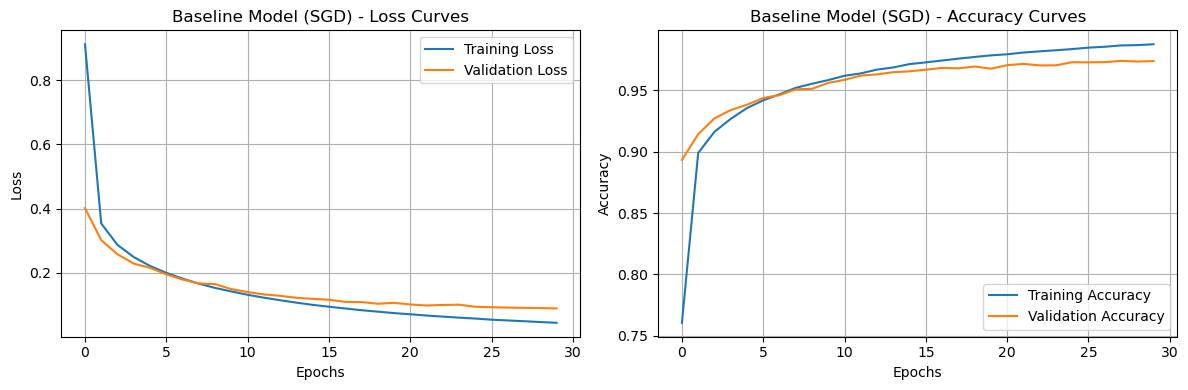

In [4]:
def plot_training_curves(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Loss curve
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{title} - Loss Curves')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy curve
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title(f'{title} - Accuracy Curves')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_curves(baseline_history, 'Baseline Model (SGD)')

## Task 2: Optimizer Comparison Experiment

## 2.1 Experimental Setup

In [5]:
def train_with_optimizer(optimizer, optimizer_name):
    """Train model with specified optimizer"""
    model = create_baseline_model()
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(x_val, y_val),
        verbose=0
    )
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    return history, test_acc

# Define optimizers to compare
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'SGD with Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}

# Train with each optimizer
results = {}
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name}...")
    history, test_acc = train_with_optimizer(optimizer, opt_name)
    results[opt_name] = {
        'history': history,
        'test_acc': test_acc,
        'convergence_epoch': np.argmax(history.history['val_accuracy']) + 1
    }
    print(f"{opt_name} - Test Accuracy: {test_acc:.4f}")


Training with SGD...


2025-12-28 17:48:26.517298: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.
2025-12-28 17:48:27.957743: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


SGD - Test Accuracy: 0.9726

Training with SGD with Momentum...
SGD with Momentum - Test Accuracy: 0.9806

Training with Adam...
Adam - Test Accuracy: 0.9782

Training with RMSprop...
RMSprop - Test Accuracy: 0.9808


## 2.2 Comparative Visualization

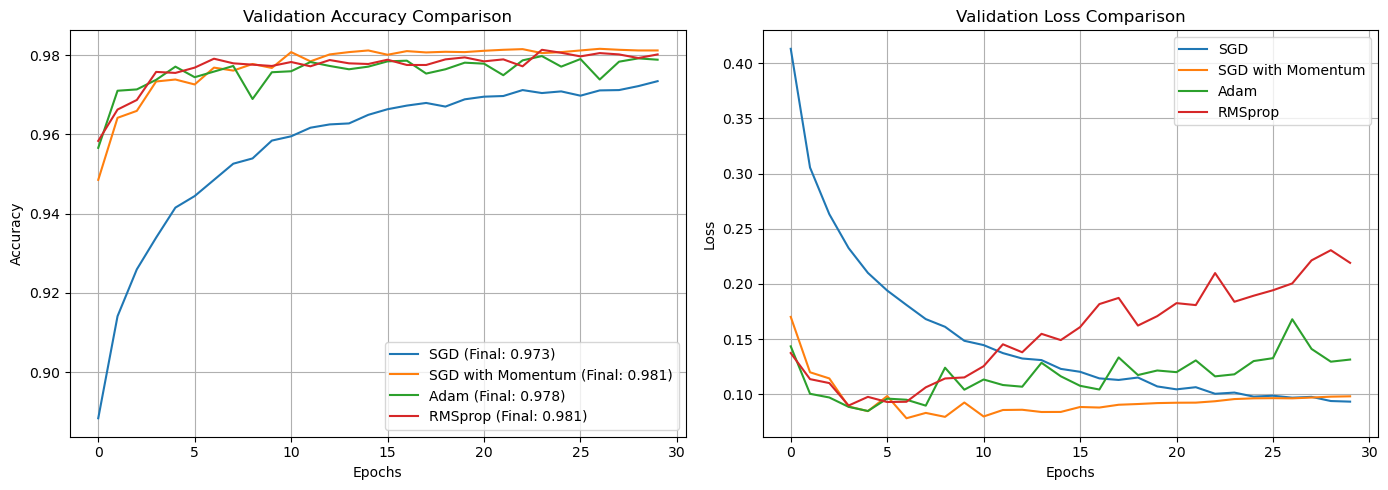

In [6]:
def compare_optimizers(results):
    plt.figure(figsize=(14, 5))
    
    # Plot validation accuracy comparison
    plt.subplot(1, 2, 1)
    for opt_name, result in results.items():
        plt.plot(result['history'].history['val_accuracy'], 
                label=f"{opt_name} (Final: {result['test_acc']:.3f})")
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot validation loss comparison
    plt.subplot(1, 2, 2)
    for opt_name, result in results.items():
        plt.plot(result['history'].history['val_loss'], 
                label=opt_name)
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

compare_optimizers(results)

## Task 3: Regularization Techniques Practice

## 3.1 Enhanced Model (to induce overfitting)

In [7]:
def create_complex_model(dropout_rate=0.0, l2_lambda=0.0):
    """Create complex model prone to overfitting"""
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate) if dropout_rate > 0 else layers.Lambda(lambda x: x),
        layers.Dense(256, activation='relu',
                    kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate) if dropout_rate > 0 else layers.Lambda(lambda x: x),
        layers.Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate) if dropout_rate > 0 else layers.Lambda(lambda x: x),
        layers.Dense(10, activation='softmax')
    ])
    return model

## 3.2 L2 Regularization Experiment

In [8]:
def experiment_l2_regularization(l2_lambdas):
    """Experiment with different L2 regularization strengths"""
    results = {}
    
    for l2_lambda in l2_lambdas:
        print(f"\nTraining with L2 λ={l2_lambda}...")
        model = create_complex_model(l2_lambda=l2_lambda)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        history = model.fit(
            x_train, y_train,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            validation_data=(x_val, y_val),
            verbose=0
        )
        
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        
        # Calculate weight norms to show regularization effect
        total_weight_norm = 0
        for layer in model.layers:
            if hasattr(layer, 'weights'):
                for weight in layer.weights:
                    if 'kernel' in weight.name:
                        total_weight_norm += tf.reduce_sum(tf.square(weight)).numpy()
        
        results[l2_lambda] = {
            'history': history,
            'test_acc': test_acc,
            'weight_norm': total_weight_norm,
            'train_acc': history.history['accuracy'][-1],
            'val_acc': history.history['val_accuracy'][-1]
        }
    
    return results

# Run L2 experiments
l2_results = experiment_l2_regularization([0.0, 0.001, 0.01, 0.1])


Training with L2 λ=0.0...

Training with L2 λ=0.001...

Training with L2 λ=0.01...

Training with L2 λ=0.1...


## 3.3 Dropout Experiment

In [9]:
def experiment_dropout(dropout_rates):
    """Experiment with different dropout rates"""
    results = {}
    
    for rate in dropout_rates:
        print(f"\nTraining with Dropout rate={rate}...")
        model = create_complex_model(dropout_rate=rate)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        history = model.fit(
            x_train, y_train,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            validation_data=(x_val, y_val),
            verbose=0
        )
        
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        
        results[rate] = {
            'history': history,
            'test_acc': test_acc,
            'train_acc': history.history['accuracy'][-1],
            'val_acc': history.history['val_accuracy'][-1],
            'gap': history.history['accuracy'][-1] - history.history['val_accuracy'][-1]
        }
    
    return results

# Run Dropout experiments
dropout_results = experiment_dropout([0.0, 0.2, 0.5])


Training with Dropout rate=0.0...

Training with Dropout rate=0.2...

Training with Dropout rate=0.5...


## Visualize regularization effects

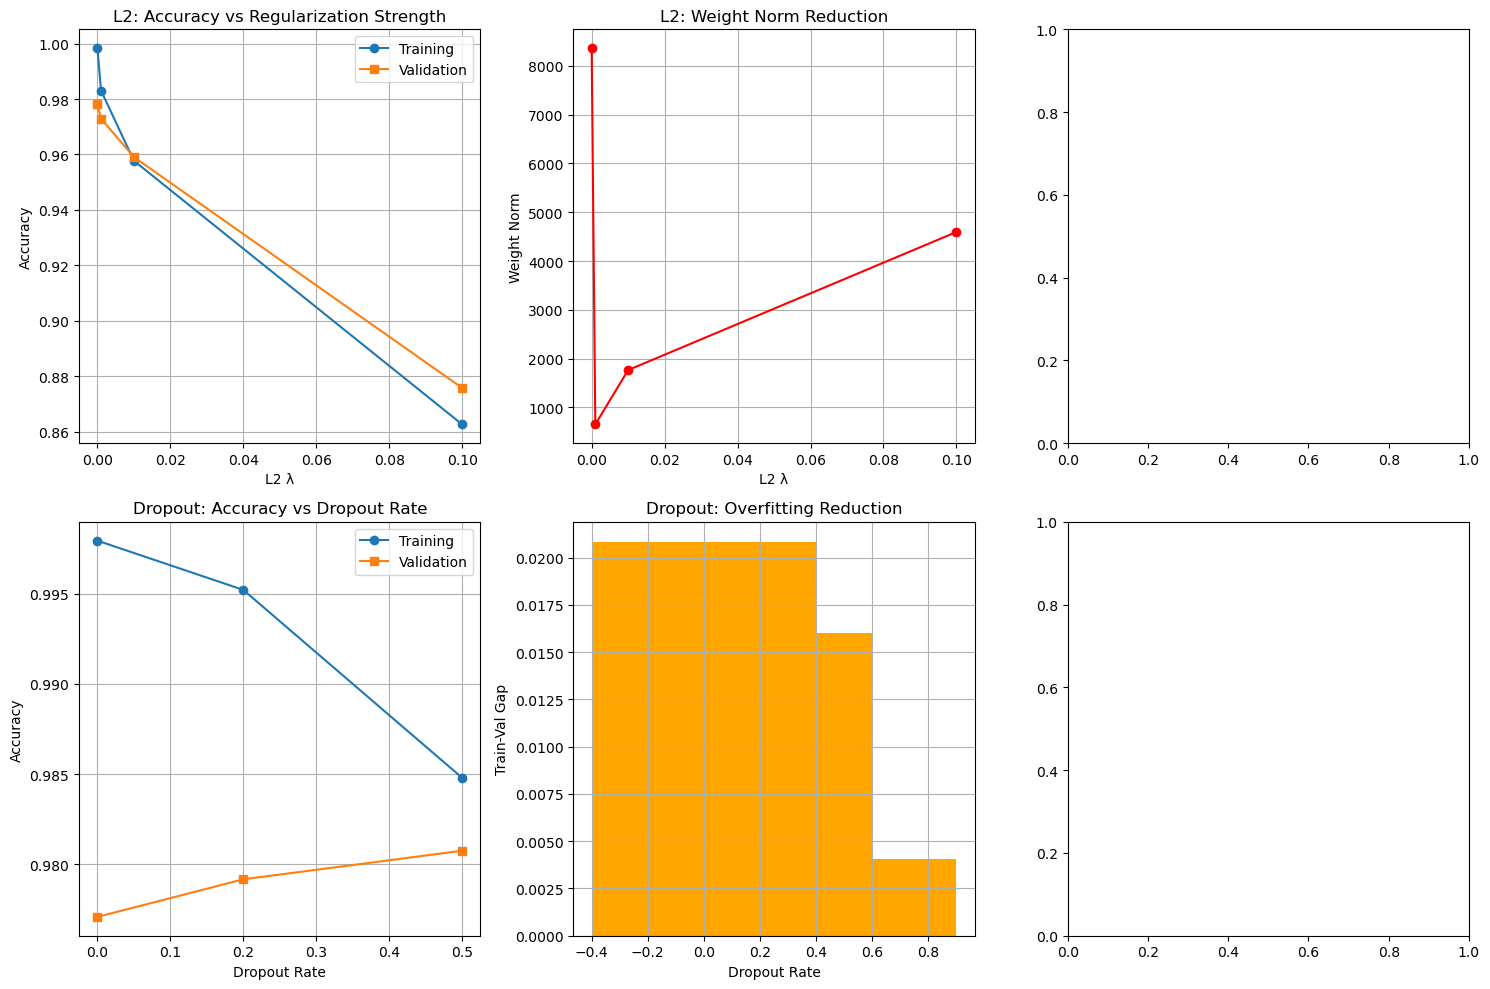

In [10]:
# Visualize regularization effects
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# L2 effects
l2_lambdas = list(l2_results.keys())
train_accs = [l2_results[l]['train_acc'] for l in l2_lambdas]
val_accs = [l2_results[l]['val_acc'] for l in l2_lambdas]
weight_norms = [l2_results[l]['weight_norm'] for l in l2_lambdas]

axes[0,0].plot(l2_lambdas, train_accs, 'o-', label='Training')
axes[0,0].plot(l2_lambdas, val_accs, 's-', label='Validation')
axes[0,0].set_xlabel('L2 λ')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('L2: Accuracy vs Regularization Strength')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].plot(l2_lambdas, weight_norms, 'o-', color='red')
axes[0,1].set_xlabel('L2 λ')
axes[0,1].set_ylabel('Weight Norm')
axes[0,1].set_title('L2: Weight Norm Reduction')
axes[0,1].grid(True)

# Dropout effects
dropout_rates = list(dropout_results.keys())
dropout_train = [dropout_results[r]['train_acc'] for r in dropout_rates]
dropout_val = [dropout_results[r]['val_acc'] for r in dropout_rates]
gaps = [dropout_results[r]['gap'] for r in dropout_rates]

axes[1,0].plot(dropout_rates, dropout_train, 'o-', label='Training')
axes[1,0].plot(dropout_rates, dropout_val, 's-', label='Validation')
axes[1,0].set_xlabel('Dropout Rate')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Dropout: Accuracy vs Dropout Rate')
axes[1,0].legend()
axes[1,0].grid(True)

axes[1,1].bar(dropout_rates, gaps, color='orange')
axes[1,1].set_xlabel('Dropout Rate')
axes[1,1].set_ylabel('Train-Val Gap')
axes[1,1].set_title('Dropout: Overfitting Reduction')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

## Task 4: Hyperparameter Tuning

## 4.1 Learning Rate Tuning

In [11]:
def tune_learning_rate(learning_rates):
    """Tune learning rate for optimal model"""
    results = {}
    
    for lr in learning_rates:
        print(f"\nTraining with learning rate={lr}...")
        model = create_complex_model(dropout_rate=0.2, l2_lambda=0.001)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Early stopping to prevent overtraining
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
        
        history = model.fit(
            x_train, y_train,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping],
            verbose=0
        )
        
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        
        results[lr] = {
            'test_acc': test_acc,
            'final_val_acc': history.history['val_accuracy'][-1],
            'convergence_epoch': len(history.history['val_accuracy']),
            'min_val_loss': min(history.history['val_loss'])
        }
    
    return results

# Test different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
lr_results = tune_learning_rate(learning_rates)


Training with learning rate=0.0001...

Training with learning rate=0.001...

Training with learning rate=0.01...

Training with learning rate=0.1...


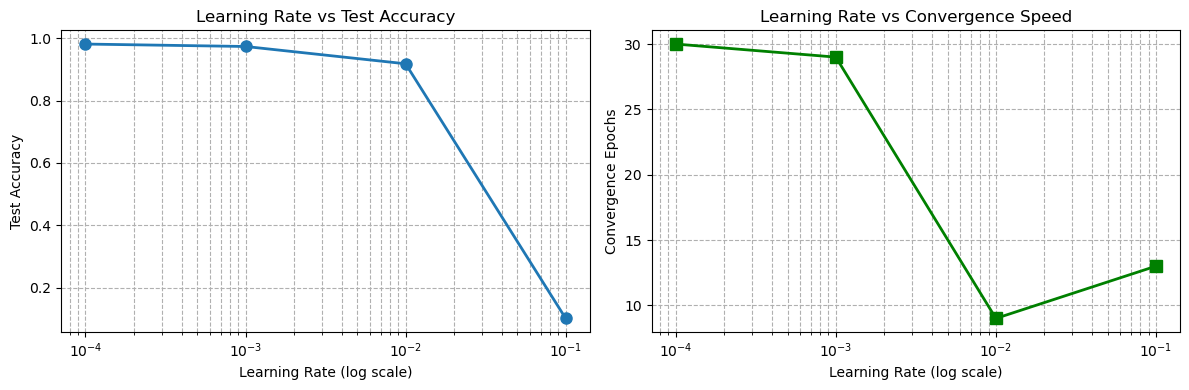

In [12]:
# Plot learning rate effects
lrs = list(lr_results.keys())
test_accs = [lr_results[lr]['test_acc'] for lr in lrs]
conv_epochs = [lr_results[lr]['convergence_epoch'] for lr in lrs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.semilogx(lrs, test_accs, 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Learning Rate (log scale)')
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Learning Rate vs Test Accuracy')
ax1.grid(True, which="both", ls="--")

ax2.semilogx(lrs, conv_epochs, 's-', color='green', linewidth=2, markersize=8)
ax2.set_xlabel('Learning Rate (log scale)')
ax2.set_ylabel('Convergence Epochs')
ax2.set_title('Learning Rate vs Convergence Speed')
ax2.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()